In [5]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
from keras import Sequential
from keras.layers import Dense, Layer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [6]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv("Dataset\housing.csv",header = None, delimiter=r"\s+", names=column_names)

In [7]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

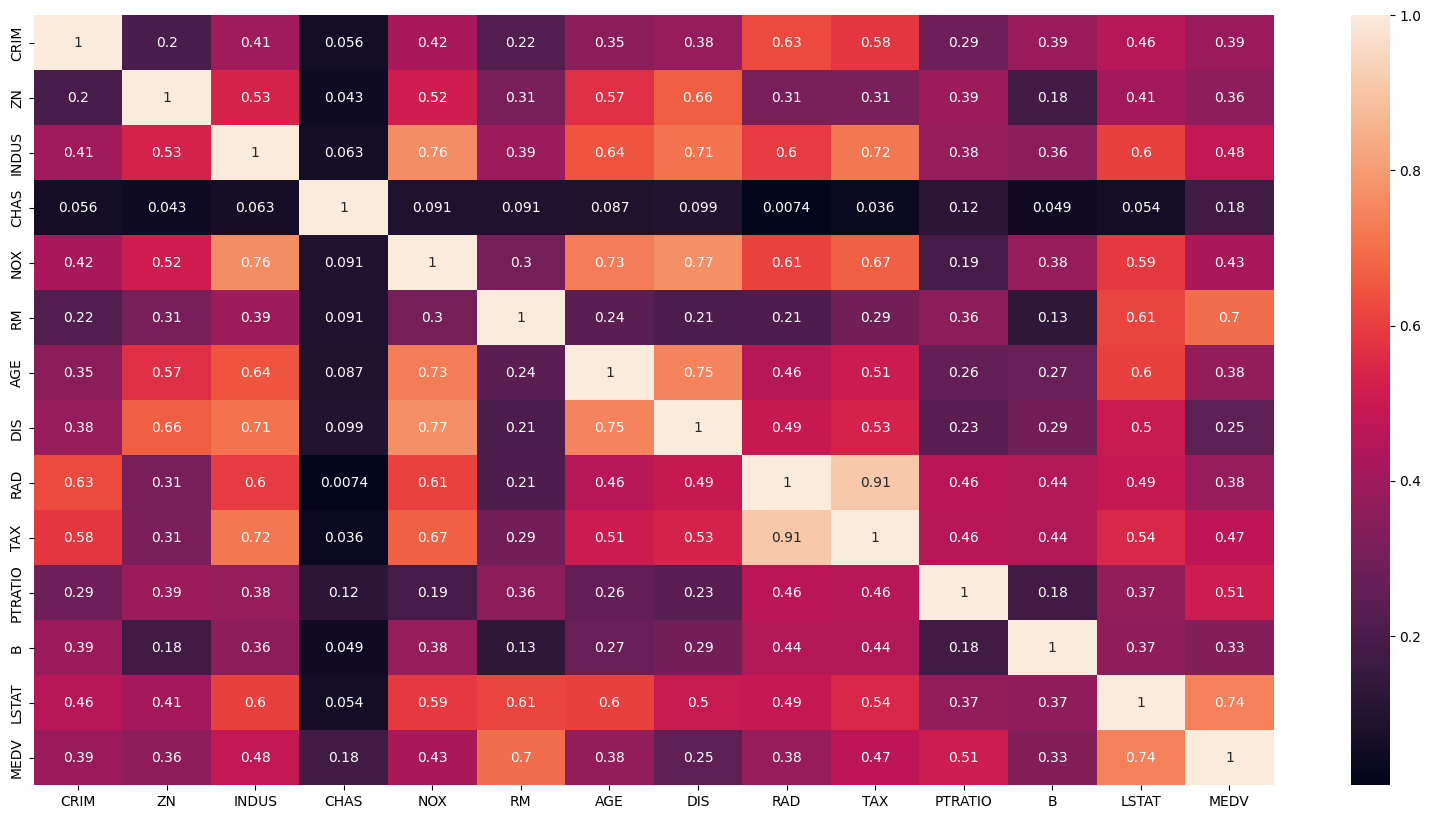

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.heatmap(dataset.corr().abs(), annot=True)

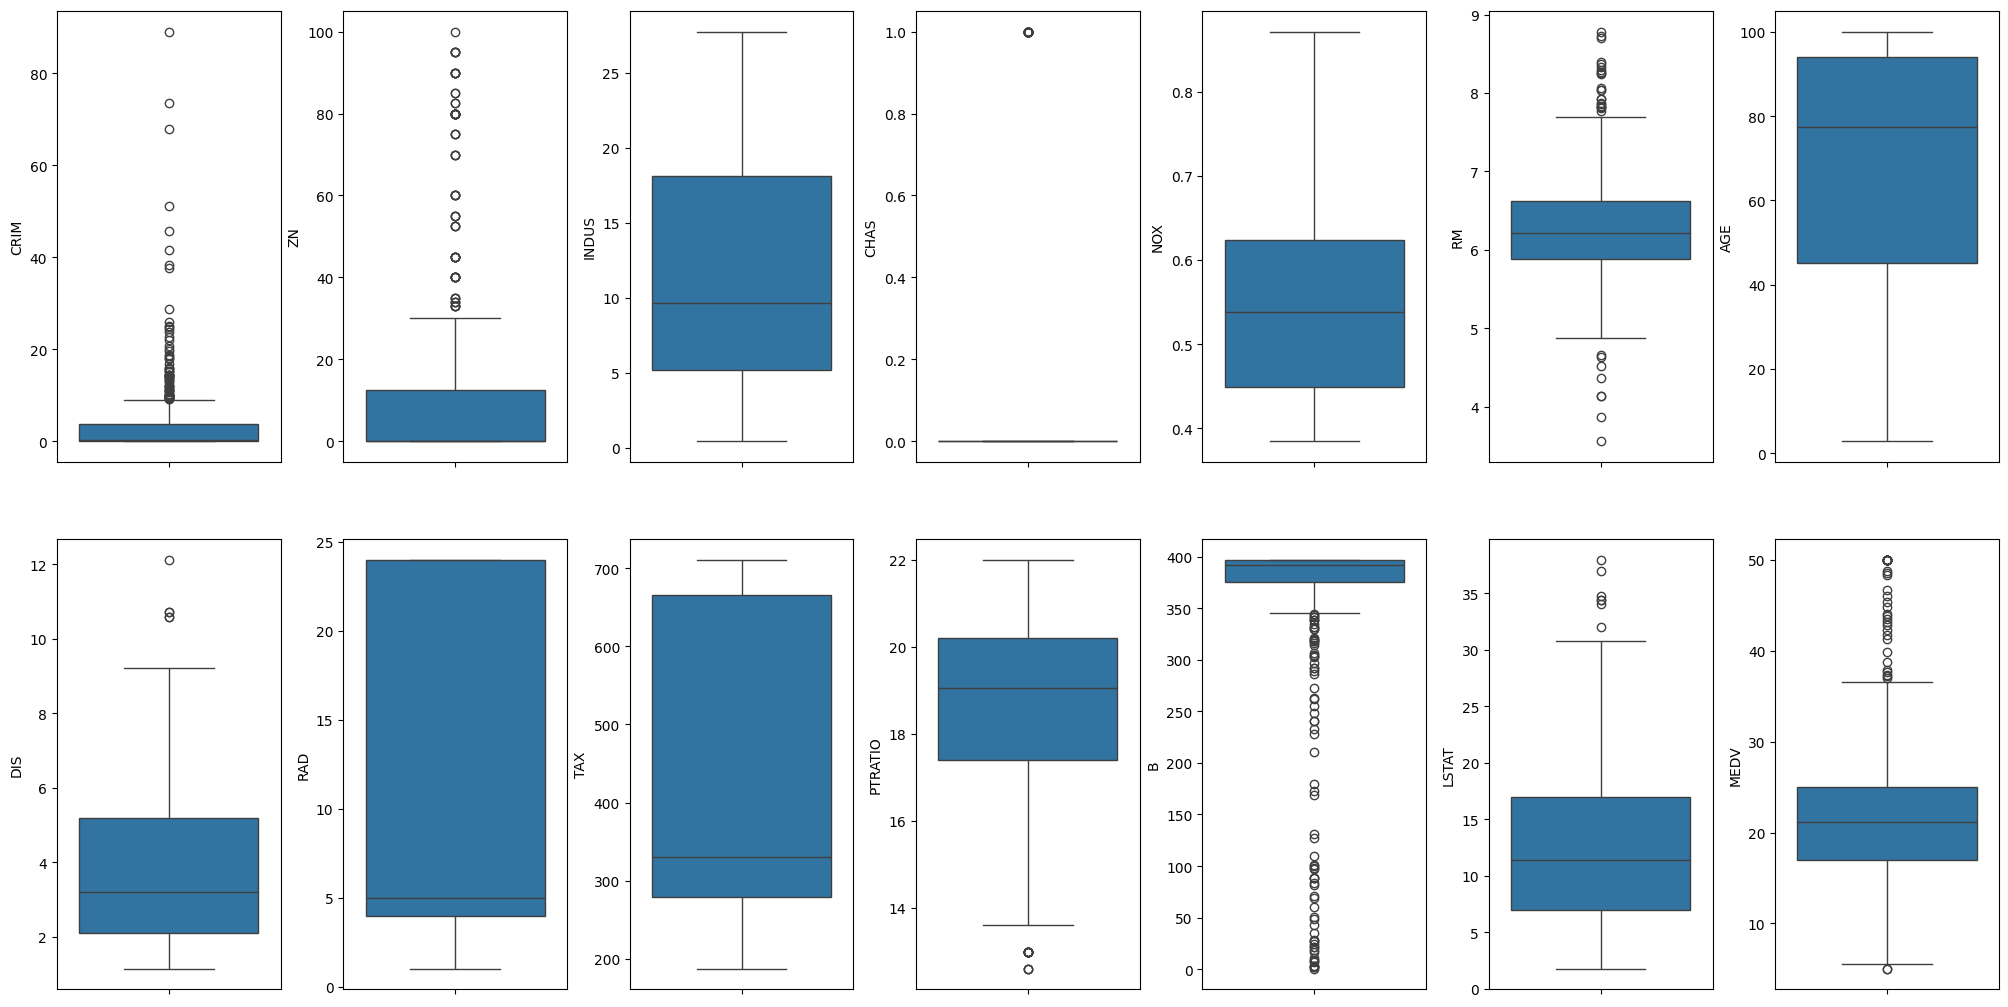

In [12]:
fig, axes = plt.subplots(nrows=2,ncols=7,figsize=(20,10))
index = 0
axes = axes.flatten()
for k,v in dataset.items():
    sns.boxplot(y=k,data=dataset,ax=axes[index])
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [13]:
from scipy import stats
import numpy as np

In [14]:
for k,v in dataset.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(dataset)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [15]:
data = dataset[~(dataset["MEDV"] >= 50.0)]

In [16]:
dataset.shape

(506, 14)

In [17]:
data.shape

(490, 14)

In [18]:
data.reset_index(inplace=True)

In [19]:
data.drop('index',inplace=True,axis=1)

C:\Users\Sharma\AppData\Local\Temp\ipykernel_17348\3240819030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('index',inplace=True,axis=1)


In [20]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
486,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
487,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
488,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [21]:
X = data.iloc[:,:-1]

In [22]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
486,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
487,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
488,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [23]:
y = data.iloc[:,-1]

In [24]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
485    22.4
486    20.6
487    23.9
488    22.0
489    11.9
Name: MEDV, Length: 490, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((343, 13), (147, 13), (343,), (147,))

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
length = len(X_train[0])

In [29]:
X_train

array([[ 0.8826298 , -0.51242559,  1.02355229, ...,  0.83695106,
        -3.65727405,  1.78728383],
       [-0.42399171, -0.51242559, -1.28666115, ...,  0.14764208,
         0.41576203, -1.35625567],
       [-0.41914472,  2.10243149, -1.35776697, ..., -0.03617365,
         0.39065083, -0.68902738],
       ...,
       [ 0.08755346, -0.51242559,  1.02355229, ...,  0.83695106,
         0.37329135, -0.01767189],
       [ 0.23026921, -0.51242559,  1.02355229, ...,  0.83695106,
        -0.01374861,  0.6784467 ],
       [-0.40023579, -0.51242559, -0.36083441, ...,  1.15862858,
        -3.11978526, -0.2983205 ]])

In [30]:
model = Sequential()
model.add(Dense(64,input_shape=(length,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='linear'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',loss="mean_squared_error",metrics=['mean_squared_error'])
history = model.fit(X_train,y_train,epochs=50,validation_split=0.2,batch_size=32)

Epoch 1/50
9/9 [==============================] - 3s 67ms/step - loss: 550.4110 - mean_squared_error: 550.4110 - val_loss: 512.2001 - val_mean_squared_error: 512.2001
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 525.1406 - mean_squared_error: 525.1406 - val_loss: 486.1826 - val_mean_squared_error: 486.1827
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 499.0603 - mean_squared_error: 499.0603 - val_loss: 456.6664 - val_mean_squared_error: 456.6664
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 468.5710 - mean_squared_error: 468.5710 - val_loss: 421.7152 - val_mean_squared_error: 421.7152
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 432.9968 - mean_squared_error: 432.9968 - val_loss: 380.5296 - val_mean_squared_error: 380.5296
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 389.4205 - mean_squared_error: 389.4205 - val_loss: 333.0500 - val_mean_squared_error: 333.0500


<Axes: >

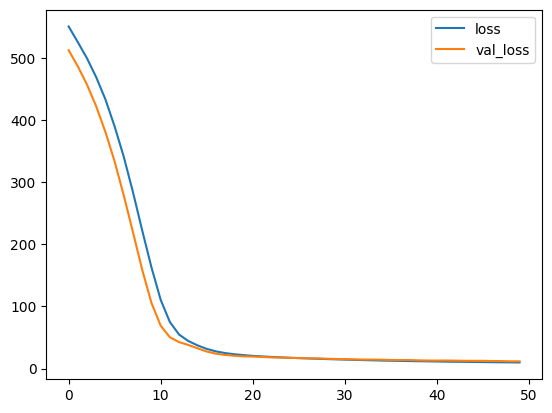

In [33]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()

In [34]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 2.369067625448006
Mean Squared Error (MSE): 10.249686343268142
Root Mean Squared Error (RMSE): 3.20151313338992
R² Score: 0.8047963009727641


### Hyperparmeter Tuning

In [37]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units1', min_value=32, max_value=128, step=32), activation='relu', input_shape=(length,)))
    model.add(Dense(hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=['mean_absolute_error'])
    return model

C:\Users\Sharma\AppData\Local\Temp\ipykernel_17348\4084797371.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [38]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    directory='tuner_dir',
    project_name='price_prediction'
)

tuner.search(X_train, y_train, epochs=5, validation_split=0.2)

Trial 5 Complete [00h 00m 03s]
val_mean_absolute_error: 13.829693794250488

Best val_mean_absolute_error So Far: 13.829693794250488
Total elapsed time: 00h 00m 15s


In [39]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
9/9 [==============================] - 1s 40ms/step - loss: 548.6274 - mean_absolute_error: 21.9809 - val_loss: 497.1860 - val_mean_absolute_error: 21.0505
Epoch 2/50
9/9 [==============================] - 0s 11ms/step - loss: 502.5622 - mean_absolute_error: 20.9271 - val_loss: 448.1074 - val_mean_absolute_error: 19.9008
Epoch 3/50
9/9 [==============================] - 0s 11ms/step - loss: 449.1722 - mean_absolute_error: 19.6598 - val_loss: 385.4332 - val_mean_absolute_error: 18.3441
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 381.3539 - mean_absolute_error: 17.9167 - val_loss: 305.2618 - val_mean_absolute_error: 16.1387
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 297.2217 - mean_absolute_error: 15.5675 - val_loss: 215.4581 - val_mean_absolute_error: 13.2018
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 207.9625 - mean_absolute_error: 12.7038 - val_loss: 131.2315 - val_mean_absolute_error: 9.7760

In [40]:
test_loss, test_mae = best_model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


5/5 [==============================] - 0s 4ms/step - loss: 8.4397 - mean_absolute_error: 2.1936
Test MAE: 2.1935720443725586


In [41]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
9/9 [==============================] - 0s 20ms/step - loss: 7.2155 - mean_absolute_error: 2.0832 - val_loss: 10.8278 - val_mean_absolute_error: 2.6472
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 7.0554 - mean_absolute_error: 2.0469 - val_loss: 10.4033 - val_mean_absolute_error: 2.5769
Epoch 3/50
9/9 [==============================] - 0s 10ms/step - loss: 7.0284 - mean_absolute_error: 2.0400 - val_loss: 10.3994 - val_mean_absolute_error: 2.5810
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 6.9486 - mean_absolute_error: 2.0302 - val_loss: 10.6032 - val_mean_absolute_error: 2.6106
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 6.9264 - mean_absolute_error: 2.0346 - val_loss: 10.6060 - val_mean_absolute_error: 2.6118
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 6.9050 - mean_absolute_error: 2.0318 - val_loss: 9.9660 - val_mean_absolute_error: 2.5243
Epoch 7/50
9/9 [==============